# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset.

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam,SGD

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jul 13 14:44:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Inspect the shapes of the datasets
print("X train data",X_train.shape)
print("X test data",X_test.shape)
print("y train data",y_train)
print('y test data',y_test)

# Convert labels to one-hot encoding


print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')


X train data (60000, 28, 28)
X test data (10000, 28, 28)
y train data [9 0 0 ... 3 0 5]
y test data [9 2 1 ... 8 1 5]
Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


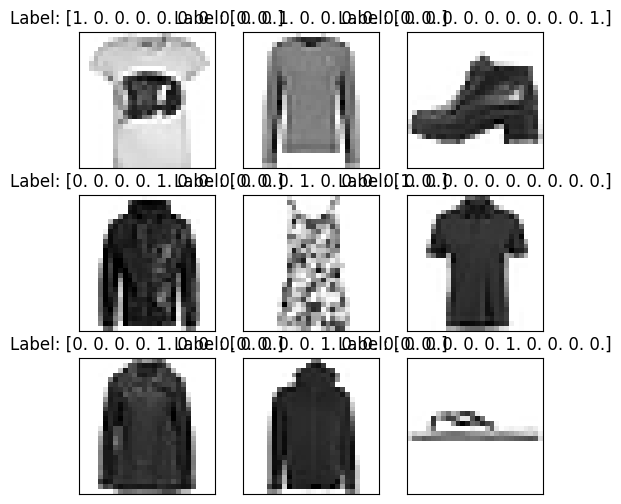

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected
# Selecting 9 random indices
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {y_train[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

## Images doesnot seem good quality yet probably due to model is not trained/fit yet

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
# You can use `model.add(<layer>)` to add layers to the model
model = Sequential()
model.add(Flatten())
model.add(Dense(64,activation='relu',input_shape=(28,28)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

# Compile the model using `model.compile()`
model.compile(optimizer=SGD(learning_rate=0.001,momentum=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model with `model.fit()`
model.fit(X_train,y_train,batch_size=32,epochs=10)

# Evaluate the model with `model.evaluate()`
results = model.evaluate(X_test,y_test,batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3594 - loss: 1.9610
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6633 - loss: 1.0623
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7165 - loss: 0.8282
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7484 - loss: 0.7319
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7724 - loss: 0.6654
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7842 - loss: 0.6334
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7965 - loss: 0.5943
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8094 - loss: 0.5668
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8135 - loss: 0.5509
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8187 - loss: 0.5335
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8106 - loss: 0.5408


In [7]:
print(f'Test Loss, Test Accuracy with SGD optimizer',results)

Test Loss, Test Accuracy with SGD optimizer [0.5490541458129883, 0.8069000244140625]


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
# You can use `model.add(<layer>)` to add layers to the model
model = Sequential()
model.add(Flatten())
model.add(Dense(64,activation='relu',input_shape=(28,28)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

# Compile the model using `model.compile()`
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model with `model.fit()`
model.fit(X_train,y_train,batch_size=32,epochs=10)

# Evaluate the model with `model.evaluate()`
results = model.evaluate(X_test,y_test,batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7605 - loss: 0.6825
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8605 - loss: 0.3803
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8736 - loss: 0.3489
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8814 - loss: 0.3239
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8861 - loss: 0.3062
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8917 - loss: 0.2931
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8971 - loss: 0.2754
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8989 - loss: 0.2708
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9031 - loss: 0.2588
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9035 - loss: 0.2559
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8756 - loss: 0.3586


In [9]:
print(f'Test Loss, Test Accuracy with Adam Optimizeer',results)

Test Loss, Test Accuracy with Adam Optimizeer [0.35017532110214233, 0.878000020980835]


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**
# For Base Model using just Sequential API without using CNN, Perforamnce is around 87% which is Not bad or Good depending on how u look. It's definitely can be improved to around 95% or so since to classify images of this low accuracy is not good. Also, Test Loss seems to be around 35% which is kinda bad

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

## Performance is low due to not applying Convolution yet as Convolution architecture is designed to improve the performance in recognizing the images using convolution, kernel/filter and applying MaxPooling/Avg. Pooling etc

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [10]:
from keras.layers import Conv2D,MaxPooling2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f'Shape of X_train {X_train.shape}')
print(f'Shape of X_train {X_test.shape}')

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]))
model.add(MaxPooling2D(2))
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(256,3,activation='relu',padding='same'))
model.add(Conv2D(256,3,activation='relu',padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

# # Compile the model using `model.compile()`
model.compile(optimizer=SGD(learning_rate=0.001,momentum=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

# # Train the model with `model.fit()`
# # Train the model
model.fit(X_train,y_train,epochs=10,batch_size=32)


# # Evaluate the model
# # Evaluate the model with `model.evaluate()`
result = model.evaluate(X_test,y_test)

Shape of X_train (60000, 28, 28, 1)
Shape of X_train (10000, 28, 28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.1298 - loss: 2.2957
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3474 - loss: 2.0442
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6852 - loss: 0.8369
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7308 - loss: 0.7141
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7560 - loss: 0.6600
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7739 - loss: 0.6143
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7848 - loss: 0.5826
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7996 - loss: 0.5451
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8097 - loss: 0.5227
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8169 - loss: 0.5054
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8197 - loss: 0.5171


In [11]:
print(f'Test Loss, Test Accuracy with SGD',result)

Test Loss, Test Accuracy with SGD [0.5143336653709412, 0.8187000155448914]


In [12]:
from keras.layers import Conv2D,MaxPooling2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f'Shape of X_train {X_train.shape}')
print(f'Shape of X_train {X_test.shape}')

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]))
model.add(MaxPooling2D(2))
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(256,3,activation='relu',padding='same'))
model.add(Conv2D(256,3,activation='relu',padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

# # Compile the model using `model.compile()`
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

# # Train the model with `model.fit()`
# # Train the model
model.fit(X_train,y_train,epochs=10,batch_size=32)


# # Evaluate the model
# # Evaluate the model with `model.evaluate()`
result = model.evaluate(X_test,y_test)

Shape of X_train (60000, 28, 28, 1)
Shape of X_train (10000, 28, 28, 1)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7592 - loss: 0.6575
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8858 - loss: 0.3004
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9073 - loss: 0.2485
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9181 - loss: 0.2190
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9298 - loss: 0.1859
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9369 - loss: 0.1671
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9458 - loss: 0.1453
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9520 - loss: 0.1293
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9584 - loss: 0.1106
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9646 - loss: 0.0961
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/s

In [13]:
print(f'Test Loss, Test Accuracy with Adam',result)

Test Loss, Test Accuracy with Adam [0.3035420775413513, 0.914900004863739]


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
## As you can see, Accuracy went up to 91% which is signifantly better than Base model accuracy of 87%. Using Convolution filters/kernel and Max Pooling of subsampling helped to reduce memory requirement, less parameters etc improving the performance of overall model due to CNN reading the patterns in the image data better. There is room for performance by changing Hyper parameters and get the best parameters to achieve highes performance

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [14]:
# A. Test Hyperparameters
result_list = []
for filter in range(1,33,16):
  # Create a simple CNN model
  print('STEP',filter)
  model = Sequential()
  model.add(Conv2D(64,filter,activation='relu',padding='same',input_shape=[28,28,1]))
  model.add(MaxPooling2D(2))
  model.add(Conv2D(64,filter,activation='relu',padding='same'))
  model.add(Conv2D(64,filter,activation='relu',padding='same'))
  model.add(MaxPooling2D(2))
  model.add(Conv2D(64,filter,activation='relu',padding='same'))
  model.add(Conv2D(64,filter,activation='relu',padding='same'))
  model.add(MaxPooling2D(2))
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  # # Compile the model using `model.compile()`
  model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

  # # Train the model with `model.fit()`
  # # Train the model
  model.fit(X_train,y_train,epochs=10,batch_size=32)


  # # Evaluate the model
  # # Evaluate the model with `model.evaluate()`
  result = model.evaluate(X_test,y_test)
  result_list.append(result)


STEP 1
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6669 - loss: 0.8626
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7857 - loss: 0.5654
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7947 - loss: 0.5331
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8016 - loss: 0.5173
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8088 - loss: 0.5004
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8118 - loss: 0.4961
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8124 - loss: 0.4975
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8125 - loss: 0.4911
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8136 - loss: 0.4868
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8146 - loss: 0.4903
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7997 - loss: 0.5358
STEP 17
Epoch 1/10
1875/1875 ━━━━━━━━

In [15]:
for item in result_list:
  print(f'Test Loss, accuracy {item}')

Test Loss, accuracy [0.5314091444015503, 0.7997000217437744]
Test Loss, accuracy [2.30362606048584, 0.10000000149011612]


# I found if I use Adam optimizer, Accuracy is going down so I switched over to SGD with default learning rate and momentum

# Accuracy went up to 93% but came down to 79% but I only had 2 iterations to optimize Hyper parameters due to long time taking if I increase iterations to 4 or 5

In [19]:
# B. Test presence or absence of regularization
# A. Test Hyperparameters
result_list = []
for filter in range(1,33,16):
  print('STEP',filter)
  # Create a simple CNN model
  model = Sequential()
  model.add(Conv2D(64,filter,activation='relu',padding='same',input_shape=[28,28,1]))
  model.add(MaxPooling2D(2))
  model.add(Conv2D(128,filter,activation='relu',padding='same'))
  model.add(Conv2D(128,filter,activation='relu',padding='same'))
  model.add(MaxPooling2D(2))
  model.add(Conv2D(256,filter,activation='relu',padding='same'))
  model.add(Conv2D(256,filter,activation='relu',padding='same'))
  model.add(MaxPooling2D(2))
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation='softmax'))

  # # Compile the model using `model.compile()`
  model.compile(optimizer=SGD(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

  # # Train the model with `model.fit()`
  # # Train the model
  model.fit(X_train,y_train,epochs=10,batch_size=32)


  # # Evaluate the model
  # # Evaluate the model with `model.evaluate()`
  result = model.evaluate(X_test,y_test)
  result_list.append(result)


STEP 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1190 - loss: 2.2999
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1674 - loss: 2.2896
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1949 - loss: 2.2741
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2147 - loss: 2.2430
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2366 - loss: 2.1635
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2702 - loss: 1.9732
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3244 - loss: 1.7633
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3538 - loss: 1.6461
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3835 - loss: 1.5675
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4002 - loss: 1.5114
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5147 - loss: 1.2510
STEP 17
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━

## I tried to increase range Max upto 256 but it's taking long time to train even with TPU/GPU's in google colab so I reduce to 64 with increment of 16. Performance has gone up to almost 90%. due to applying Drop out to fix regualarization if any.

## After applying Drop out

In [20]:
for item in result_list:
  print(f'Test Loss, accuracy {item}')

Test Loss, accuracy [1.2447173595428467, 0.5175999999046326]
Test Loss, accuracy [0.6471859216690063, 0.7567999958992004]


#Test Accuracy stabilized around 76% with Drop out, learning rate=0.001 with SGD optimizer. May be if we use automated Hyper parameter tuners like Optuna or Keras Tuner, and get more GPU, we can run for longer iterations and extract Best Performance training model

I found that SGD optimizer is giving better accuracy over Adam so I switched over to SGD with default learning rate

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [21]:
# B. Test presence or absence of regularization
# A. Test Hyperparameters
# Create a simple CNN model
model = Sequential()
model.add(Conv2D(64,filter,activation='relu',padding='same',input_shape=[28,28,1]))
model.add(MaxPooling2D(2))
model.add(Conv2D(128,filter,activation='relu',padding='same'))
model.add(Conv2D(128,filter,activation='relu',padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(256,filter,activation='relu',padding='same'))
model.add(Conv2D(256,filter,activation='relu',padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

#Compile the model using `model.compile()`
model.compile(optimizer=SGD(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

# # Train the model with `model.fit()`
# # Train the model
model.fit(X_train,y_train,epochs=10,batch_size=32)


# # Evaluate the model
# # Evaluate the model with `model.evaluate()`
result = model.evaluate(X_test,y_test)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.1392 - loss: 2.2999
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.2052 - loss: 2.2083
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.3804 - loss: 1.6778
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.5111 - loss: 1.3436
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.5679 - loss: 1.1837
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6025 - loss: 1.0884
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6268 - loss: 1.0177
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6475 - loss: 0.9448
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6676 - loss: 0.8986
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6882 - loss: 0.8499
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7556 - loss: 0.6522


In [22]:
print(f'Final Test Loss, accuracy {item}')

Final Test Loss, accuracy [0.6471859216690063, 0.7567999958992004]


## Final Test Loss stabilied around 75%. Didnt improve much. But If I can rework again

##  I would use automated tools to search for Hyperparameters Optimization like Keras Tuner or Optuna
# https://optuna.org/
# https://www.tensorflow.org/tutorials/keras/keras_tuner

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

# I would also use MLFlow for Experiementation Tracking and compare visually to see which model performs better and deploy that model in production

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.